In [2]:
# make classification data

In [3]:
from sklearn.datasets import make_circles

In [4]:
# make samples
n_samples = 1000
# make the dataset
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [5]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [6]:
import pandas as pd

In [7]:
circles = pd.DataFrame({"X1" : X[:,0],
                       "X2" : X[:,1],
                       "label" : y})

In [8]:
circles[:5]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [9]:
import matplotlib.pyplot as plt

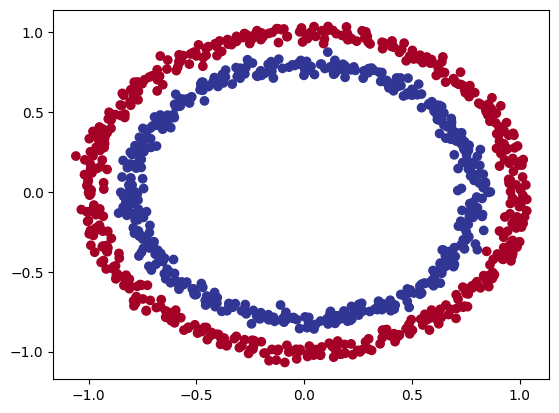

In [10]:
plt.scatter(x = X[:,0],
            y = X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu)

**NOTE** : The data we're working ono is caled a toy dataset, a dataset small enough to work on easily and large enought to practice the fundamentals

### Turning data into tensors

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# checking shapes of the datasets first value
X_sample  = X[0]
y_sample = y[0]
print(f"shape of one component of X: {X_sample.shape}")
print(f"shape of one component of y: {y_sample.shape}")
print(f"one component of X: {X[0]}")
print(f"one component of y: {y[0]}")

shape of one component of X: (2,)
shape of one component of y: ()
one component of X: [0.75424625 0.23148074]
one component of y: 1


In [13]:
import torch
torch.__version__

'2.0.1+cu118'

In [14]:
# were changing form numpy to tensors, numpy have dtype as float64 and tensor have float32 as dafault dtype so we'll need to change the dtype to float 32
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [15]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [16]:
#splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [17]:
len(X_train), len(X_test)

(800, 200)

## building a model to classify our blue and red dot splits
## to do so:
1. Setup device agnostic code
2. Construct a model (by subclassing `nn.module`)
3. Define a loss function and optimizer

In [18]:
import torch
from torch import nn

# making device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [19]:
device

'cuda'

Now we've setup device agnostic code, les create the model:
1. Subclass `nn.module` (almost all models in PyTorch subclass 'nn.module')
2. Create 2 `nn.linear()` layers that are capable of handling the shapes of our data
3. Define a `forward` method that outlines the process
4. Institiate an instance of our model class and send it to the atrget `device`

In [20]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features, ipsales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from prev layer, outputs the output
  # define a forward method that outlines forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# lets replicate the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 5.4442e-01,  1.5943e-01],
                      [-1.1869e-04,  3.0232e-01],
                      [ 6.2333e-01, -4.4237e-01],
                      [ 1.6396e-01,  6.1915e-01],
                      [-4.3879e-01, -5.7368e-01]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1528, -0.5820, -0.4319, -0.4395,  0.2257], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3842,  0.4129, -0.1474, -0.3350, -0.1821]], device='cuda:0')),
             ('1.bias', tensor([0.1880], device='cuda:0'))])

In [24]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of predictions: {len(y_test)}, shape: {y_test.shape}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of predictions: 200, shape: torch.Size([200])


In [25]:
untrained_preds[:10]

tensor([[ 0.2974],
        [ 0.1968],
        [ 0.3621],
        [ 0.2800],
        [ 0.0458],
        [-0.0132],
        [-0.0459],
        [-0.0959],
        [ 0.3753],
        [ 0.1865]], device='cuda:0')

In [26]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

### Setup loss function and optimizer
Different for different problems
1. regression- MAE, MSE
2. classification- Binary cross entropy, categorical cross entropy

Loss function measures how wrong your preds are.

And for optimizer, two most common are SGD and adam

In [27]:
# lets setup loss function
# loss_fn = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to BCE lloss
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 5.4442e-01,  1.5943e-01],
                      [-1.1869e-04,  3.0232e-01],
                      [ 6.2333e-01, -4.4237e-01],
                      [ 1.6396e-01,  6.1915e-01],
                      [-4.3879e-01, -5.7368e-01]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1528, -0.5820, -0.4319, -0.4395,  0.2257], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3842,  0.4129, -0.1474, -0.3350, -0.1821]], device='cuda:0')),
             ('1.bias', tensor([0.1880], device='cuda:0'))])

In [29]:
# calculate accuracy - out of 100 examples, how many do we get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## Train model!

Built a trainig loop with these steps

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backwards(Backprop)
5. Optimizer step(gradient descent)


### Going from raw logits -> prediction probabilities -> prediction labels

Our moedl outputs are going to be raw **logits**

We can convert these **logits** into preds by passing them to some kind of function (e.g. sigmoid for binary cross entropy and softmax forn multiclass classification)

Then we can convert out model's predictions probabilities to predcition labels by either rounding them or taking the `argmax()`

In [30]:
# view first 5 outputs of forward pass
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2974],
        [0.1968],
        [0.3621],
        [0.2800],
        [0.0458]], device='cuda:0')

In [31]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5738],
        [0.5490],
        [0.5895],
        [0.5695],
        [0.5115]], device='cuda:0')

In [32]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backwards(Backprop)
5. Optimizer step(gradient descent)

In [33]:
## building a train and test

epochs = 100
# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ###training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # turns logits-> y_pred_probs-> y_labels

  # 2. calculate loss and accuracy
  loss = loss_fn(y_logits,      # nn.BCEWithLogitsLoss expects y_logits in its input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # loss = loss_fn(torch.sigmoid(y_logits), # whgen using nn.BCELoss,  it expects probs
  #                y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()
  # 4. loss backwards (backprop)
  loss.backward()
  # 5. optimizer step
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    # 1. froward pass
    test_logits = model_0(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)
    ## print out whats happening
    if epoch%10 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f} | testloss: {test_loss:.5f} | TestAcc: {acc:.2f}")







Epoch: 0 | loss: 0.70146 | Acc: 52.88 | testloss: 0.69790 | TestAcc: 52.88
Epoch: 10 | loss: 0.69697 | Acc: 50.50 | testloss: 0.69511 | TestAcc: 50.50
Epoch: 20 | loss: 0.69532 | Acc: 50.12 | testloss: 0.69435 | TestAcc: 50.12
Epoch: 30 | loss: 0.69459 | Acc: 49.75 | testloss: 0.69415 | TestAcc: 49.75
Epoch: 40 | loss: 0.69417 | Acc: 49.50 | testloss: 0.69409 | TestAcc: 49.50
Epoch: 50 | loss: 0.69390 | Acc: 49.62 | testloss: 0.69408 | TestAcc: 49.62
Epoch: 60 | loss: 0.69369 | Acc: 49.62 | testloss: 0.69409 | TestAcc: 49.62
Epoch: 70 | loss: 0.69354 | Acc: 49.50 | testloss: 0.69410 | TestAcc: 49.50
Epoch: 80 | loss: 0.69342 | Acc: 49.12 | testloss: 0.69412 | TestAcc: 49.12
Epoch: 90 | loss: 0.69333 | Acc: 49.50 | testloss: 0.69415 | TestAcc: 49.50


From the metrics it looks like our model isn't learning anything..
So visualize, visualize, visualize..
To do so we import a function called `plot_decision_boundary`

In [34]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("helper function exists")
else:
  print("Download a helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Download a helper_function.py


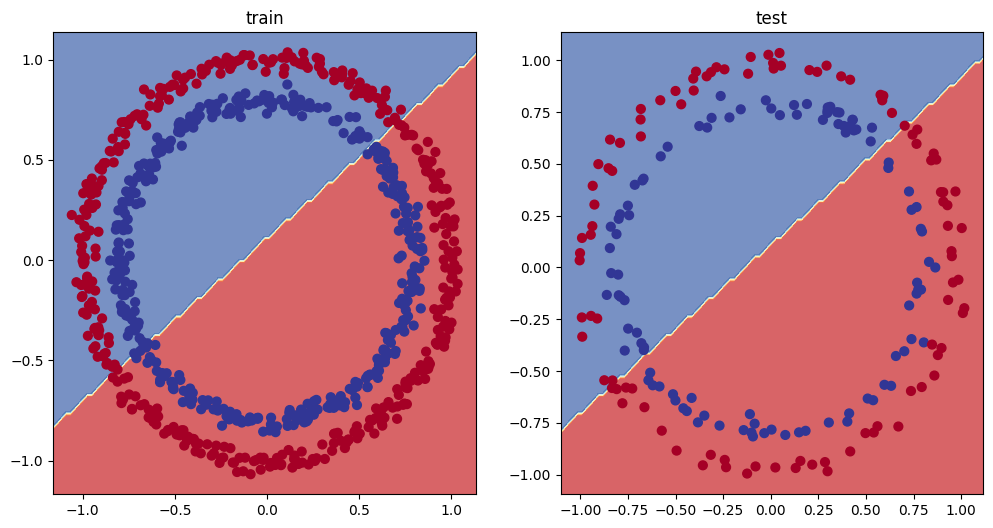

In [35]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

### Improving a model

1. Add more layers
2. Add more hidden units -> maybe go from 5 to 10 hidden units
3. Fit for longer, more epochs
4. Changing activation function
5. Change LR

These above are **hyperparams**

These are from model perspective as data can be also dealt with

In [36]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4926,  0.1618],
                      [ 0.0674,  0.2988],
                      [ 0.6109, -0.4421],
                      [ 0.1172,  0.6214],
                      [-0.4734, -0.5717]])),
             ('0.bias', tensor([-0.1351, -0.6019, -0.4255, -0.4244,  0.2346])),
             ('1.weight',
              tensor([[-0.2993,  0.4432, -0.0296, -0.2980, -0.2582]])),
             ('1.bias', tensor([0.1413]))])

In [37]:
# lets add more hidden units, increase layers, and epochs
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self,x):

    # one way
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z

    # another way
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# create a loss fn
loss_fn = nn.BCEWithLogitsLoss()
# create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [39]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')

In [40]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000


# put data on device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  #train loop
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  #testing loop
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    tets_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_preds)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")




Epoch: 0 | Loss: 0.69422 | Acc: 50.00 | Test Loss: 0.69417 | Test acc: 50.00
Epoch: 100 | Loss: 0.69329 | Acc: 50.38 | Test Loss: 0.69417 | Test acc: 54.00
Epoch: 200 | Loss: 0.69311 | Acc: 53.25 | Test Loss: 0.69417 | Test acc: 48.00
Epoch: 300 | Loss: 0.69304 | Acc: 51.25 | Test Loss: 0.69417 | Test acc: 47.50
Epoch: 400 | Loss: 0.69301 | Acc: 50.88 | Test Loss: 0.69417 | Test acc: 47.00
Epoch: 500 | Loss: 0.69299 | Acc: 51.12 | Test Loss: 0.69417 | Test acc: 47.00
Epoch: 600 | Loss: 0.69299 | Acc: 50.88 | Test Loss: 0.69417 | Test acc: 46.50
Epoch: 700 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69417 | Test acc: 46.00
Epoch: 800 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69417 | Test acc: 46.00
Epoch: 900 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69417 | Test acc: 46.00


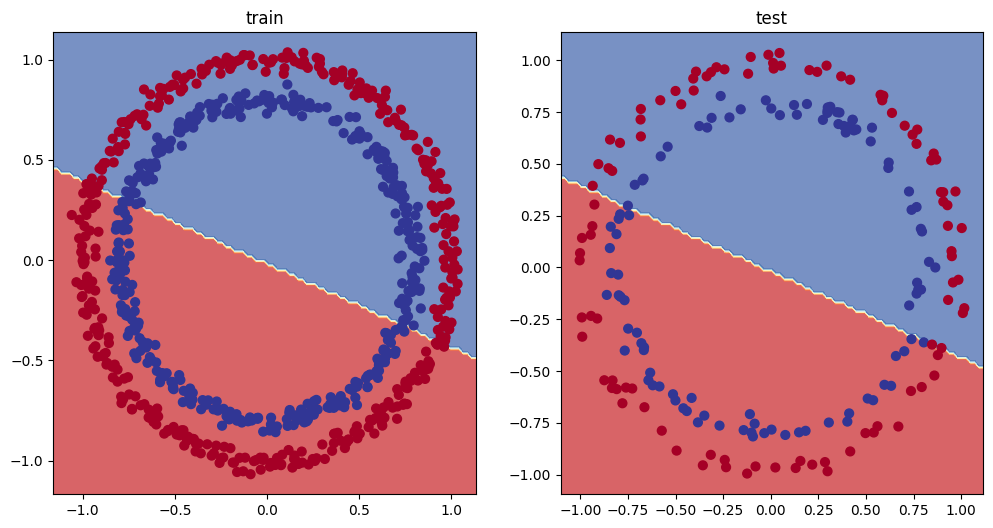

In [41]:
# plot decision boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

### The missing Piece is non linearity


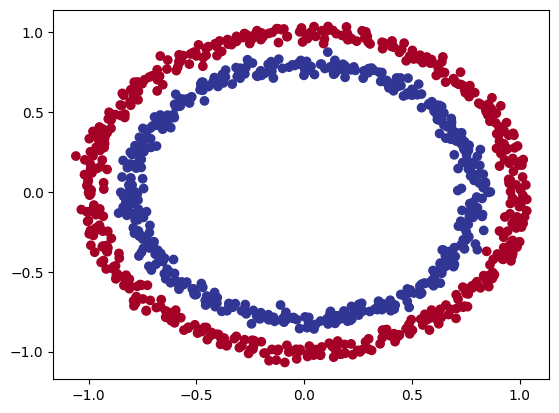

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [43]:
# convert to tensor and then split into train test
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Non linearity

Just non straight lines

In [44]:
# build a model with non linear activation
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
## optimizer, losss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

In [46]:
## training a model on no linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000
for epoch in range(epochs):
  model_2.train()

  # 1. forward pass
  y_logits = model_2(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. calc loss &  acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. step optimizer
  optimizer.step()

  ## training
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_preds)
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f} | testloss: {test_loss:.4f} | testacc: {test_acc:.2f}")




Epoch: 0 | Loss: 0.6929 | Acc: 50.00 | testloss: 0.6932 | testacc: 50.00
Epoch: 100 | Loss: 0.6912 | Acc: 52.88 | testloss: 0.6910 | testacc: 52.50
Epoch: 200 | Loss: 0.6898 | Acc: 53.37 | testloss: 0.6894 | testacc: 55.00
Epoch: 300 | Loss: 0.6879 | Acc: 53.00 | testloss: 0.6872 | testacc: 56.00
Epoch: 400 | Loss: 0.6852 | Acc: 52.75 | testloss: 0.6841 | testacc: 56.50
Epoch: 500 | Loss: 0.6810 | Acc: 52.75 | testloss: 0.6794 | testacc: 56.50
Epoch: 600 | Loss: 0.6751 | Acc: 54.50 | testloss: 0.6729 | testacc: 56.00
Epoch: 700 | Loss: 0.6666 | Acc: 58.38 | testloss: 0.6632 | testacc: 59.00
Epoch: 800 | Loss: 0.6516 | Acc: 64.00 | testloss: 0.6476 | testacc: 67.50
Epoch: 900 | Loss: 0.6236 | Acc: 74.00 | testloss: 0.6215 | testacc: 79.00


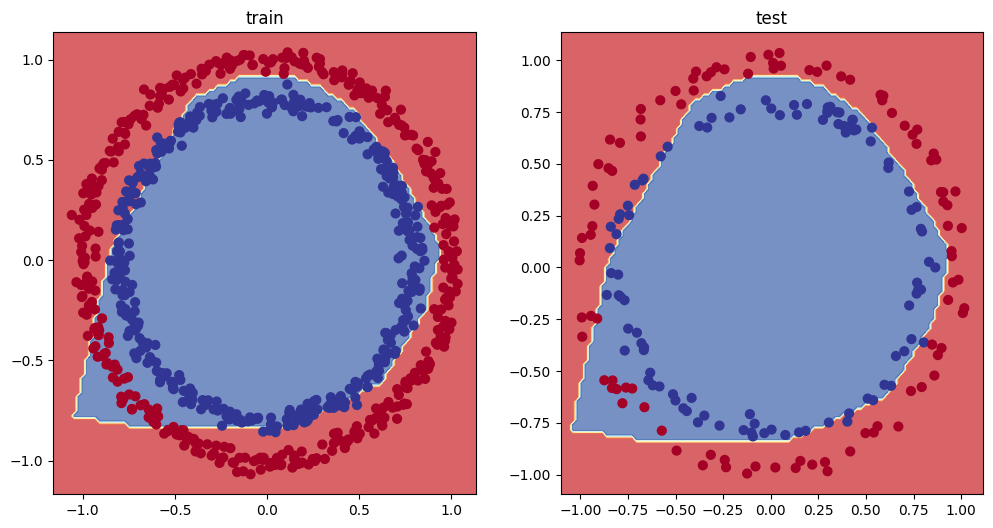

In [47]:
# plot decision boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_2, X_test, y_test)

### Multi-class classifiaction!!
Its time to extend binary classification to multi-class classification!


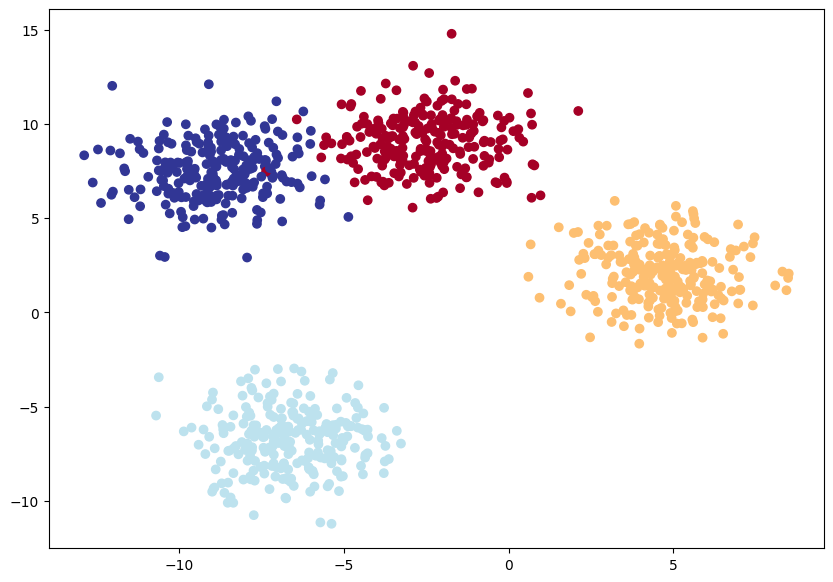

In [92]:
### creating our toy dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# create multi-class data
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state = RANDOM_SEED)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

In [93]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


In [114]:
# built a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ initialize multi class classification model

    Args:
    input_features(int) : no. of inout features thta the model takes
    output_features(int) : no. of featurs to output(here no of output classes)
    hidden_units(int): hidden units f=of a layer

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

# create instance of model
model_4 = BlobModel(input_features = 2,
                    output_features= 4,
                    hidden_units=8).to(device)
next(model_4.parameters()).is_cuda

True

In [115]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [116]:
# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# create optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr=0.01)

In order to evaluate our model and train and etst it, we need to convert our model's outputs(logits) to prediction preobabilities and then to prediction labels.

Logits(raw output of model) -> Pred probs(`torch.softmax`) -> Pred labels(`torch.argmax`)

In [117]:
# lets see what the output is normally
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test.to(device))
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [118]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [119]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:10])
print(y_pred_probs[:10])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951],
        [0.2788, 0.0088, 0.2893, 0.4232],
        [0.3246, 0.1261, 0.4545, 0.0948],
        [0.2229, 0.0443, 0.1867, 0.5461],
        [0.3447, 0.0368, 0.5269, 0.0917],
        [0.2145, 0.0510, 0.1752, 0.5593]], device='cuda:0')


In [120]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [121]:
torch.max(y_pred_probs[0])

tensor(0.3715, device='cuda:0')

In [122]:
torch.argmax(y_pred_probs[0])
# 4 values in output show how much prob is that the ans is thta partiular index

tensor(3, device='cuda:0')

In [123]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3], device='cuda:0')

In [124]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [125]:
device

'cuda'

In [126]:
# create training and testing loop..
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 400

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_train)
  y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_preds)
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.4f} | acc: {acc:.2f} | t_loss: {test_loss:.4f} | t_acc: {test_acc:.2f}")

Epoch: 0 | loss: 1.0432 | acc: 65.50 | t_loss: 0.9634 | t_acc: 71.00
Epoch: 10 | loss: 0.6369 | acc: 79.50 | t_loss: 0.6122 | t_acc: 88.00
Epoch: 20 | loss: 0.4694 | acc: 97.75 | t_loss: 0.4586 | t_acc: 98.00
Epoch: 30 | loss: 0.3734 | acc: 98.50 | t_loss: 0.3677 | t_acc: 99.00
Epoch: 40 | loss: 0.3101 | acc: 98.62 | t_loss: 0.3066 | t_acc: 99.00
Epoch: 50 | loss: 0.2649 | acc: 98.88 | t_loss: 0.2623 | t_acc: 99.00
Epoch: 60 | loss: 0.2308 | acc: 98.88 | t_loss: 0.2285 | t_acc: 99.50
Epoch: 70 | loss: 0.2043 | acc: 99.12 | t_loss: 0.2020 | t_acc: 99.50
Epoch: 80 | loss: 0.1831 | acc: 99.12 | t_loss: 0.1806 | t_acc: 99.00
Epoch: 90 | loss: 0.1658 | acc: 99.12 | t_loss: 0.1630 | t_acc: 99.00
Epoch: 100 | loss: 0.1515 | acc: 99.12 | t_loss: 0.1484 | t_acc: 99.00
Epoch: 110 | loss: 0.1394 | acc: 99.12 | t_loss: 0.1361 | t_acc: 99.00
Epoch: 120 | loss: 0.1292 | acc: 99.12 | t_loss: 0.1256 | t_acc: 99.00
Epoch: 130 | loss: 0.1205 | acc: 99.12 | t_loss: 0.1166 | t_acc: 99.00
Epoch: 140 | loss

In [127]:
y_train[0].type()

'torch.cuda.LongTensor'

In [128]:
y_logits[0].type()

'torch.cuda.FloatTensor'

### Making and evaluating predictions with a PyTorch multi-class model

In [129]:
# model predcitions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)
y_logits[:10]

tensor([[  2.6645,   6.9004, -10.9393,  -7.0430],
        [  4.1385,  -8.3677,   2.3002,   8.0082],
        [ -3.1595,  -8.9441,  15.5313,   9.2896],
        [  1.0568,   5.0718,  -6.2646,  -5.0673],
        [  5.5729,   1.9797, -10.8852,  -2.4283],
        [  4.6649, -10.3697,   3.4594,   9.9494],
        [ -3.5684,  -6.7852,  14.0063,   7.1808],
        [  5.0627,  -0.7493,  -7.1795,   0.3370],
        [ -2.9261, -12.5221,  18.8278,  12.8277],
        [  5.1620,   0.2514,  -8.3864,  -0.6685]], device='cuda:0')

In [130]:
y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [131]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

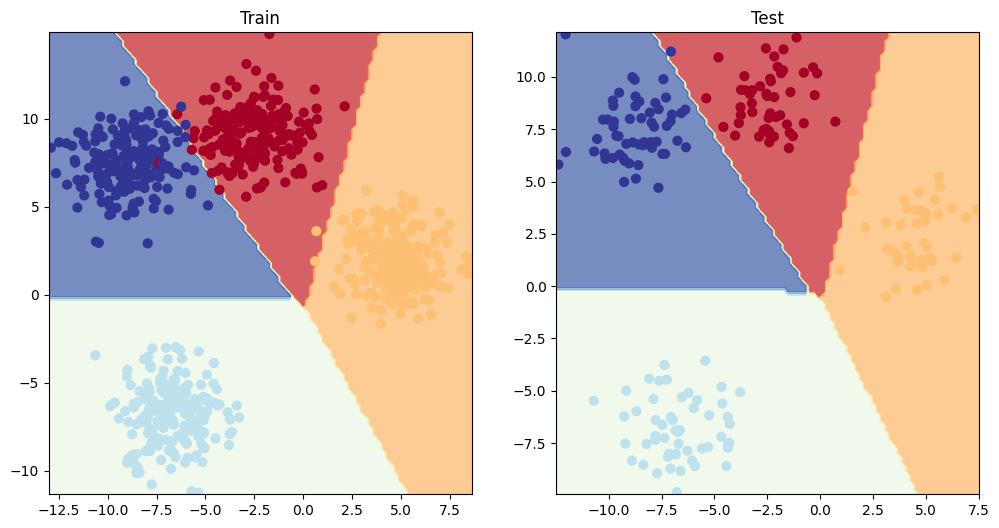

In [132]:
# plot figue
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

### A few more classification metrics

1. Accuracy - out of 100, how many do we get correct      (when dataset is balanced)
2. precision  (when dataset is not balancdd)
3. Recall     (when dataset is not balanced)
4. F1-score  (combination of precision & recall)
5. Confusion matrix
6. Classification report

